**Importing library files**

In [61]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [62]:
pwd

'/home/wsuser/work'

In [63]:
ls

forest_fire/  forest-fire-detection-model.tgz  forestfire.h5  forestfire.tar.gb


In [64]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OOhSbB9gBRTvqouyjMHAuqUdqJtEDaiGmKkEyJ9_mzMe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'forestfiredetection-donotdelete-pr-q7bq0vtwyl16o2'
object_key = 'dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [5]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

**Image preprocessing**

In [6]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory("/home/wsuser/work/forest_fire/Training and Validation",
                                        target_size=(150,150),
                                        batch_size=32,
                                        class_mode='binary')
test_dataset=test.flow_from_directory("/home/wsuser/work/forest_fire/Testing",
                                        target_size=(150,150),
                                        batch_size=32,
                                        class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [7]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

**Model building**

In [8]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
r=model.fit(train_dataset,epochs=7,validation_data=test_dataset)

Epoch 1/7
58/58 [==============================] - 66s 1s/step - loss: 0.2997 - accuracy: 0.8783 - val_loss: 0.2522 - val_accuracy: 0.9265
Epoch 2/7
58/58 [==============================] - 65s 1s/step - loss: 0.1497 - accuracy: 0.9476 - val_loss: 0.2933 - val_accuracy: 0.8676
Epoch 3/7
58/58 [==============================] - 64s 1s/step - loss: 0.1352 - accuracy: 0.9585 - val_loss: 0.3275 - val_accuracy: 0.8824
Epoch 4/7
58/58 [==============================] - 64s 1s/step - loss: 0.1105 - accuracy: 0.9651 - val_loss: 0.2293 - val_accuracy: 0.8676
Epoch 5/7
58/58 [==============================] - 64s 1s/step - loss: 0.1347 - accuracy: 0.9525 - val_loss: 0.3580 - val_accuracy: 0.8971
Epoch 6/7
58/58 [==============================] - 65s 1s/step - loss: 0.0987 - accuracy: 0.9694 - val_loss: 0.1438 - val_accuracy: 0.9706
Epoch 7/7
58/58 [==============================] - 64s 1s/step - loss: 0.0748 - accuracy: 0.9760 - val_loss: 0.0875 - val_accuracy: 0.9559


In [11]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

In [12]:
predictions

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [13]:
print(len(predictions))

68


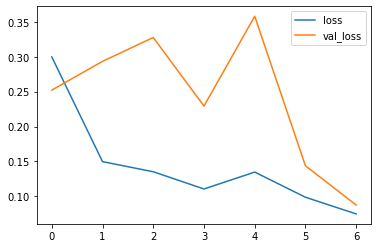

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

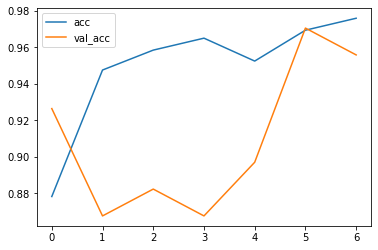

In [15]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

**Testing the model**

In [16]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(150,150))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model.predict(X)
  print(val)
  if val==1:
    plt.xlabel("No fire",fontsize=30)
  elif val==0:
    plt.xlabel("fire",fontsize=30)

[[0.]]


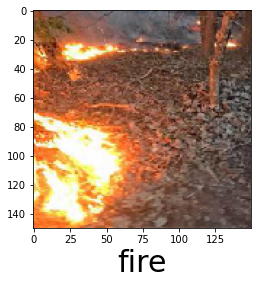

In [17]:
predictImage('/home/wsuser/work/forest_fire/Testing/fire/abc169.jpg')

[[0.]]


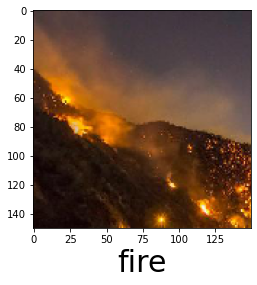

In [18]:
predictImage('/home/wsuser/work/forest_fire/Testing/fire/abc181.jpg')

In [19]:
model.save('forestfire.h5')

In [20]:
ls

forest_fire/  forestfire.h5


In [21]:
!tar -zcvf forest-fire-detection-model.tgz forestfire.h5

forestfire.h5


In [22]:
ls

forest_fire/  forest-fire-detection-model.tgz  forestfire.h5


In [23]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [24]:
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 17.3 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [25]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 9.1 MB/s eta 0:00:01


In [26]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"QRrumqchYvBpt8xjCMkXRAiDsy5b-ovLj4u35QFGp8GI"
}
client=APIClient(wml_credentials)

In [27]:
client

In [28]:
def guid_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [29]:
space_uid=guid_space_name(client,'forestfire')
print("Space UID"+space_uid)

Space UIDa1f920d4-7548-4cfe-888a-def2c2f4ccd7


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [31]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [32]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [33]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [34]:
model_details=client.repository.store_model(model='forest-fire-detection-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN model building",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [35]:
model_id=client.repository.get_model_id(model_details)

In [36]:
model_id

'03cfb991-0fde-4e4d-af57-7cd62c62672f'

In [37]:
client.repository.download(model_id,'forestfire.tar.gb')

Successfully saved model content to file: 'forestfire.tar.gb'


'/home/wsuser/work/forestfire.tar.gb'

In [38]:
pwd

'/home/wsuser/work'

In [39]:
ls

forest_fire/  forest-fire-detection-model.tgz  forestfire.h5  forestfire.tar.gb
